In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

## Training Data

In [26]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
original_traindata = pd.read_csv(dataset_url)
traindata = original_traindata.sample(n=10000, random_state=42)
traindata.head()











,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1105809,1105809,7,5,8,4,8,4,8,4,3,...,5,7,4,7,2,3,6,7,2,0.560
442591,442591,5,3,10,9,9,6,4,2,4,...,3,6,7,7,6,4,2,9,6,0.575
5434,5434,5,6,2,6,3,4,4,4,4,...,6,7,6,5,6,7,7,6,5,0.510
82966,82966,7,3,6,4,4,5,8,5,6,...,5,5,3,8,7,4,6,5,4,0.530
584893,584893,6,5,7,7,5,5,5,6,3,...,4,4,6,9,5,6,4,5,8,0.590


SCATTERPLOT

I am going to use this to see the trend each feature has and use it to help formulate my understanding.

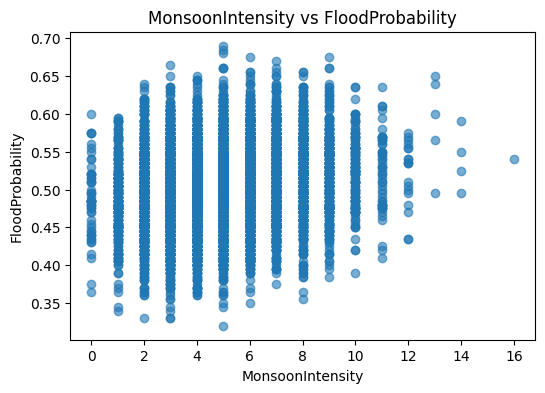

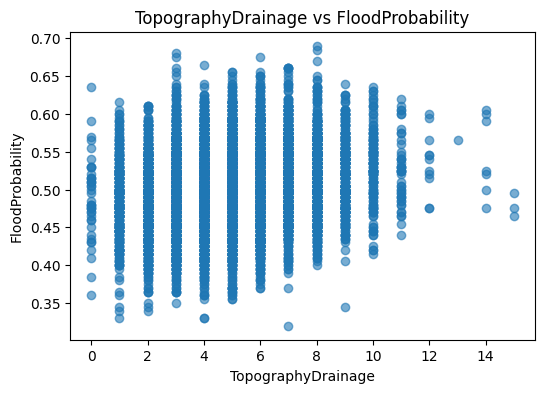

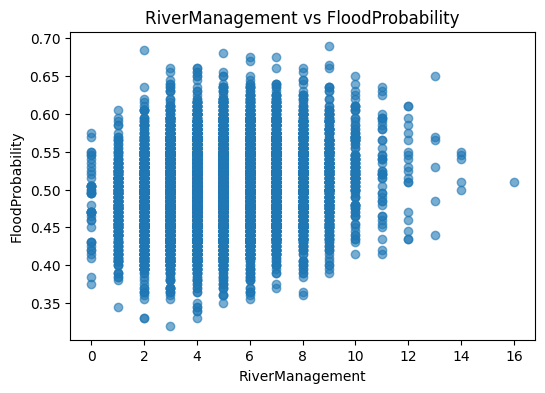

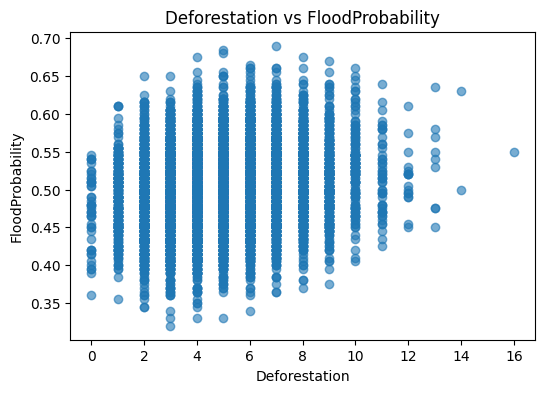

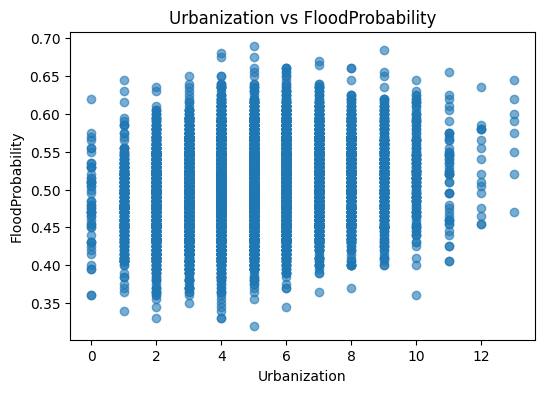

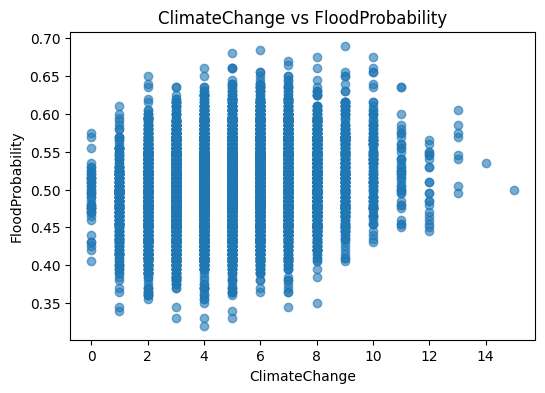

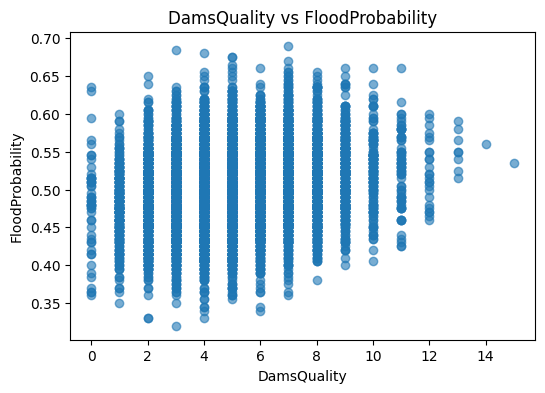

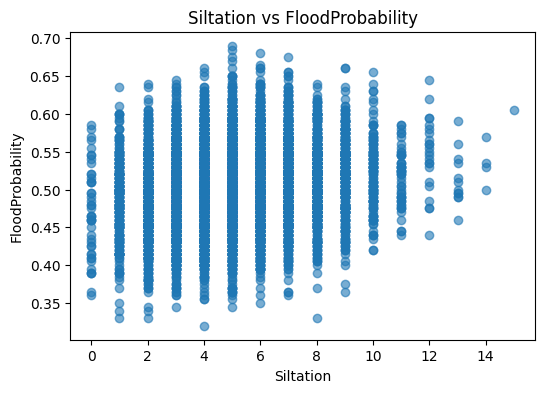

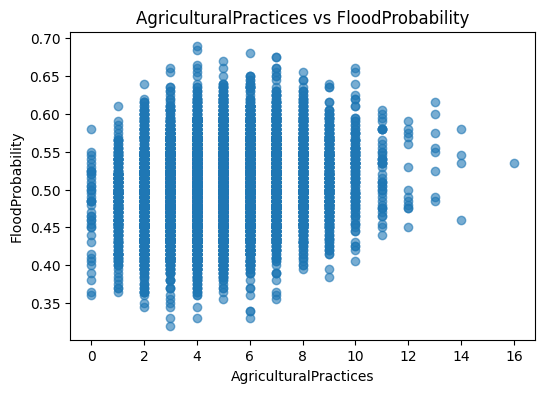

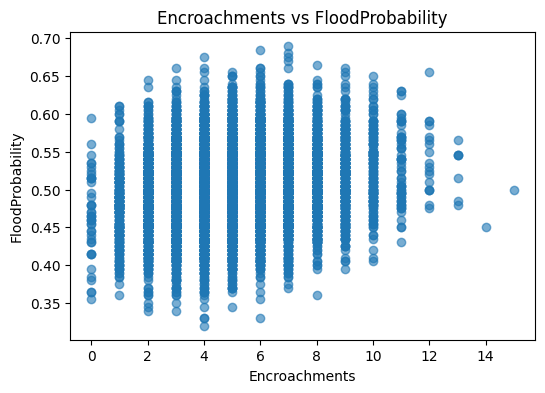

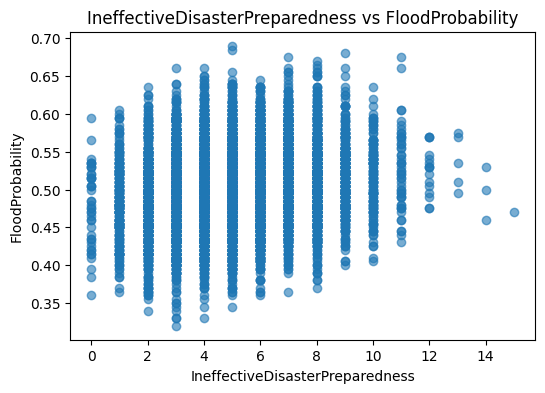

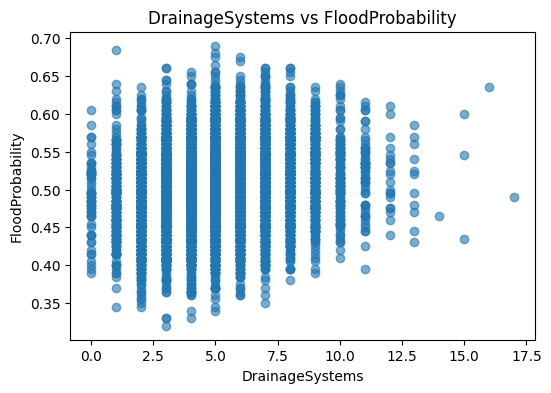

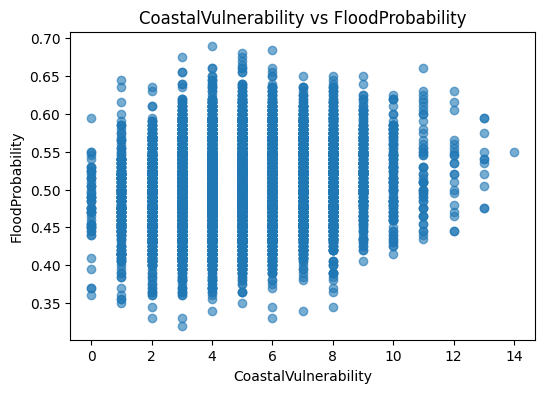

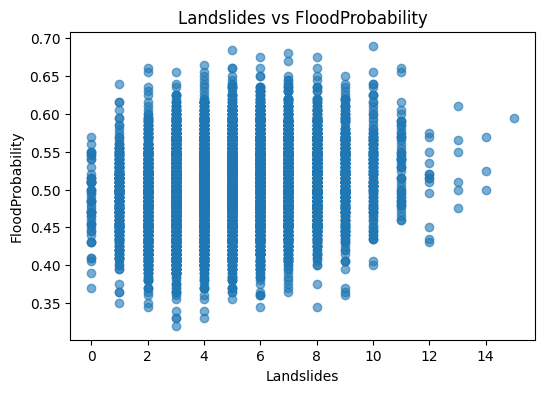

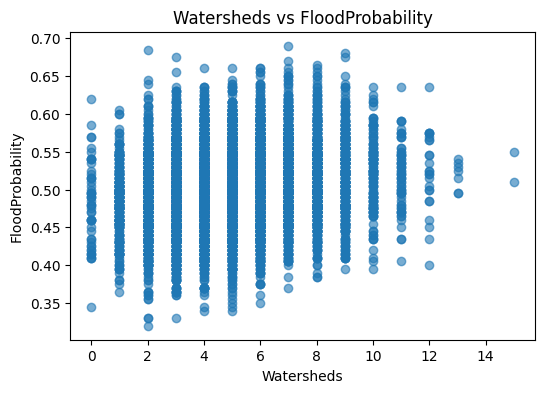

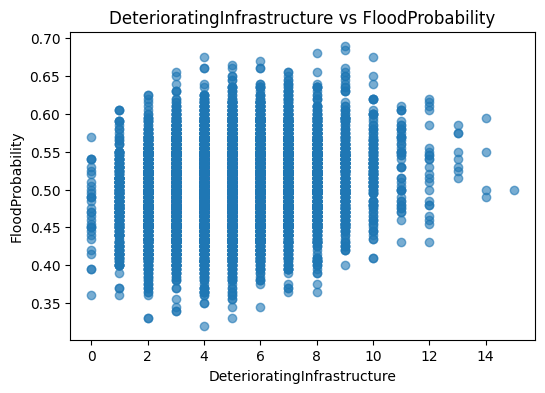

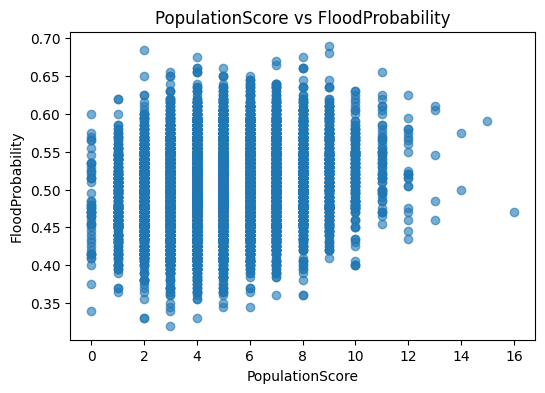

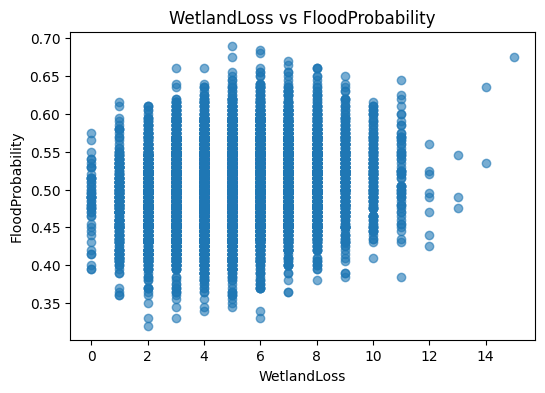

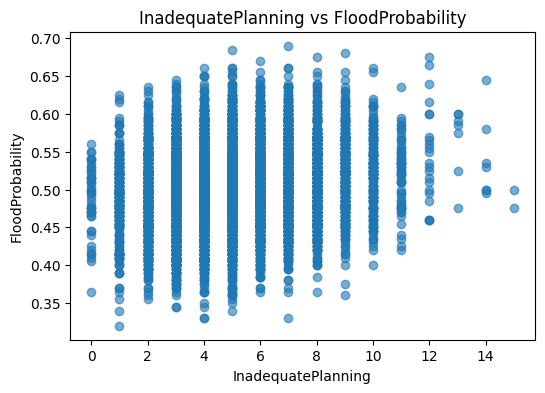

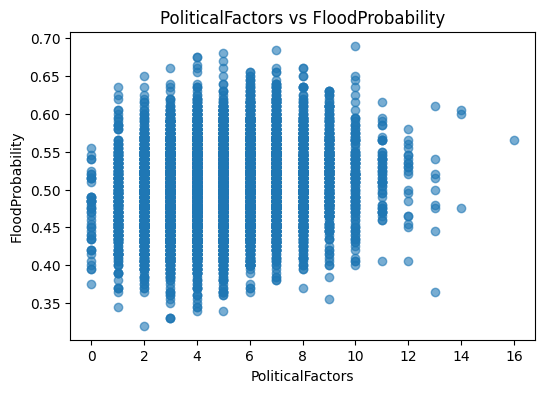

In [27]:
# Plotting the data
# Didnt use pairplot because there are too many columns
# sns.set_palette("colorblind")
# sns.pairplot(data=traindata, height=2)

# Target variable
y = "FloodProbability"

# Features to plot against FloodProbability
features = [
    "MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation",
    "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices",
    "Encroachments", "IneffectiveDisasterPreparedness", "DrainageSystems",
    "CoastalVulnerability", "Landslides", "Watersheds", "DeterioratingInfrastructure",
    "PopulationScore", "WetlandLoss", "InadequatePlanning", "PoliticalFactors"
]

# Generate one scatterplot per feature
for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(traindata[col], traindata[y], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(y)
    plt.title(f"{col} vs {y}")
    plt.show()


CORRELATION MATRIX

I will use this to see the level of correlation between the features. I can see here that it has weak correlation in general. A very useful info.

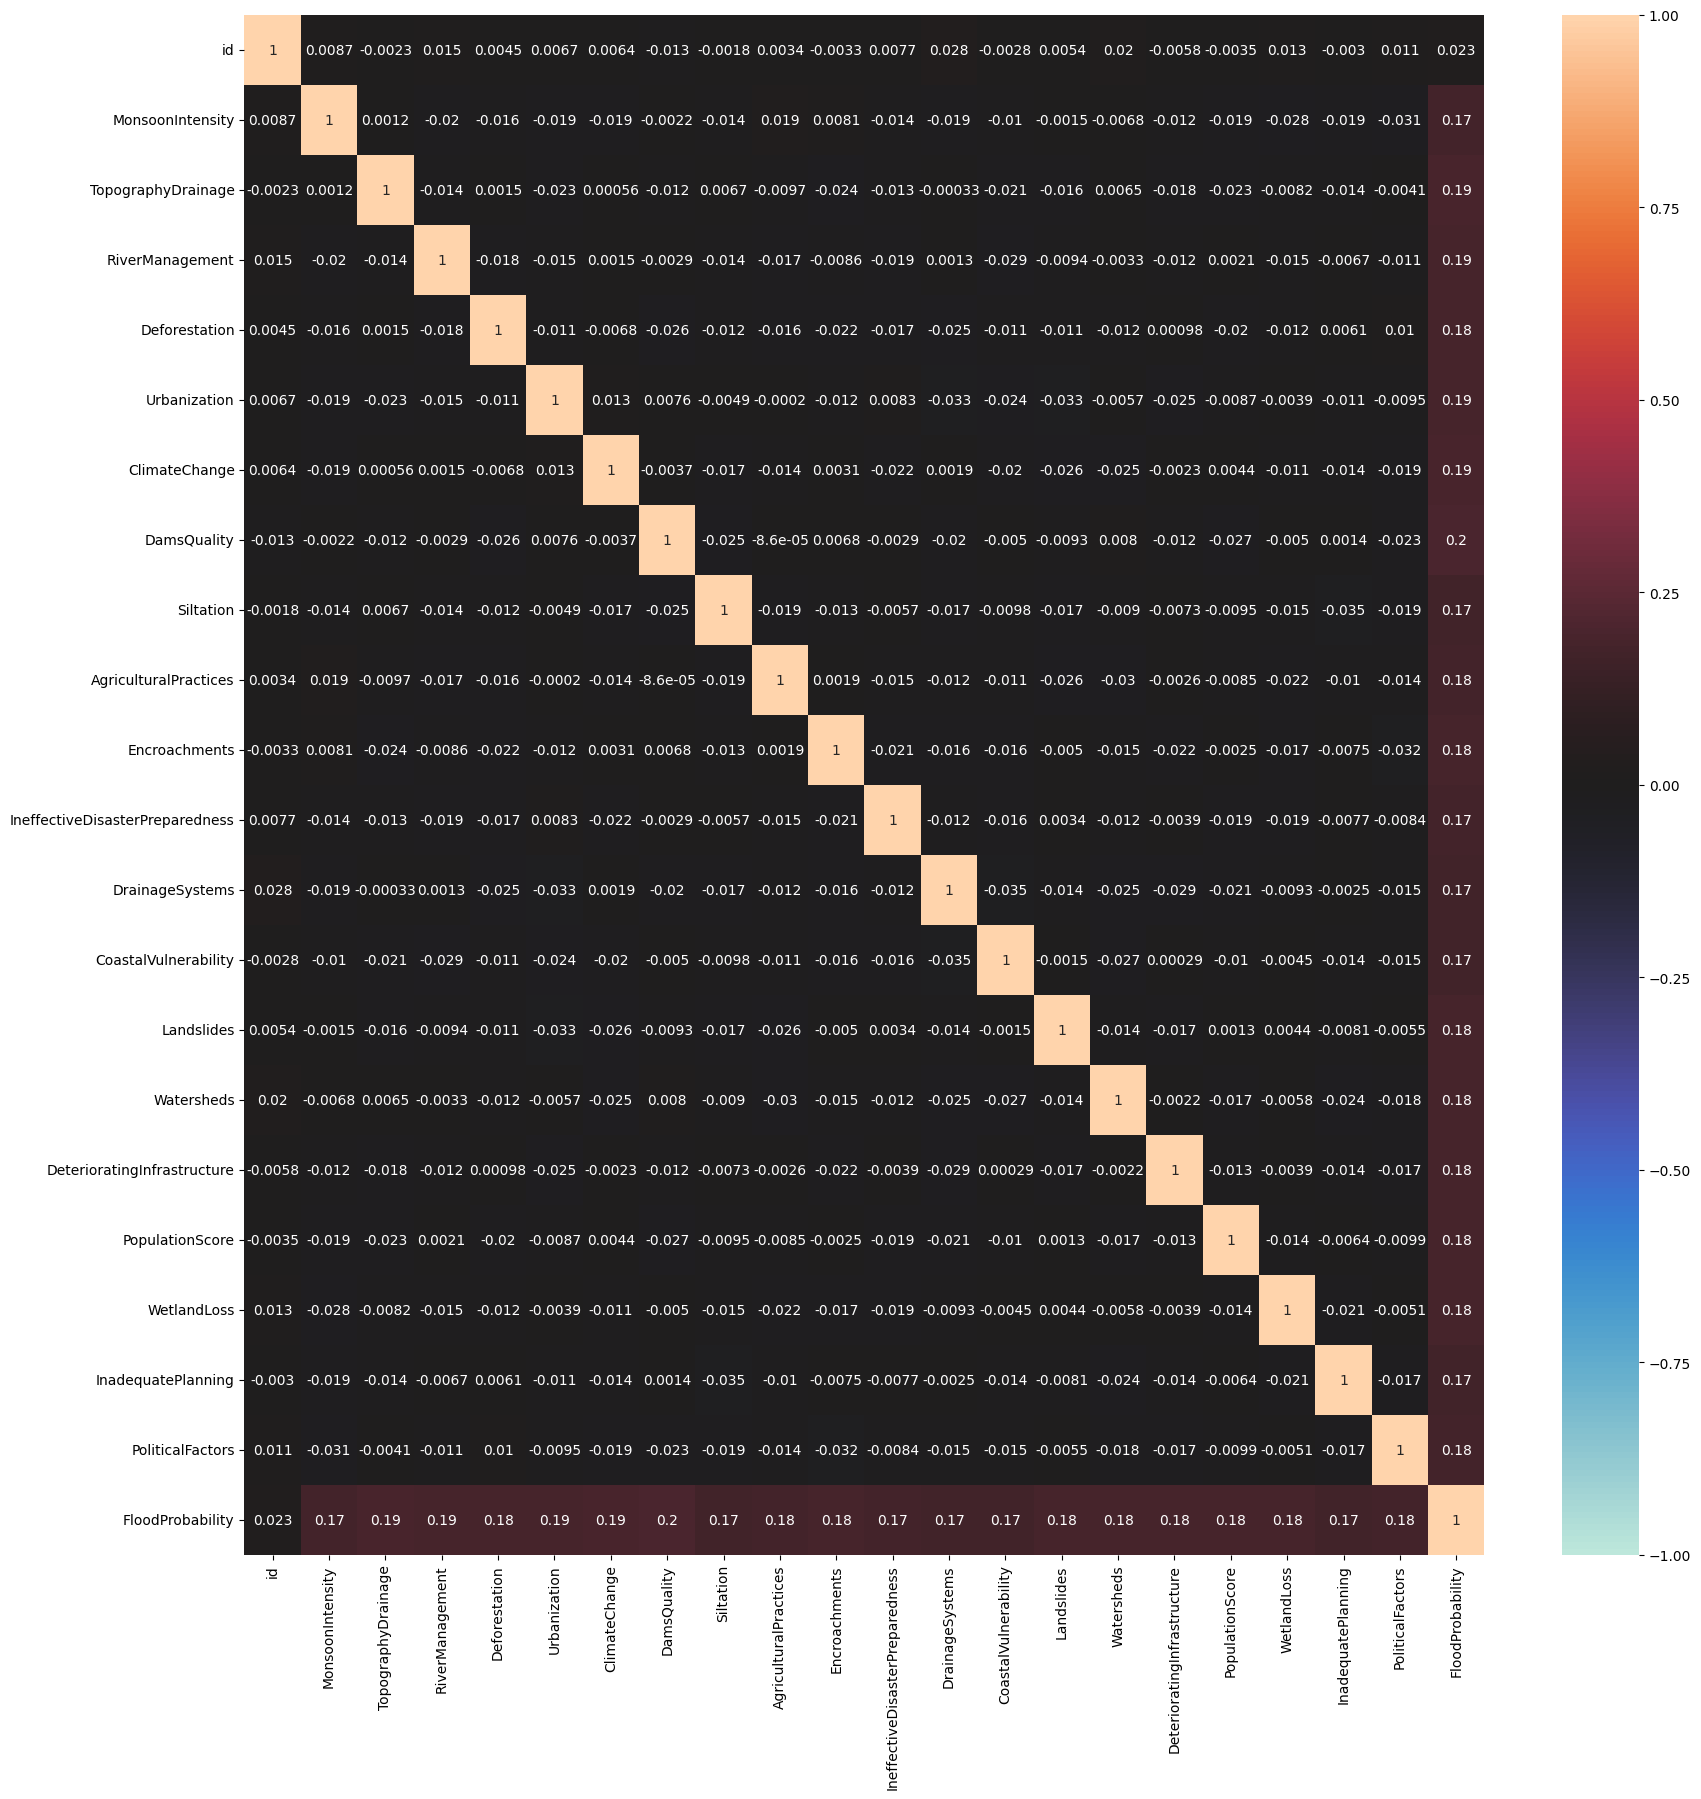

In [28]:
correlation = traindata.corr()

plt.figure(figsize=(20, 20))  # width, height in inches
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)

plt.show()


RESIDUAL PLOT

Similarly to the scatterplot, I am using this to see the trend between the features.

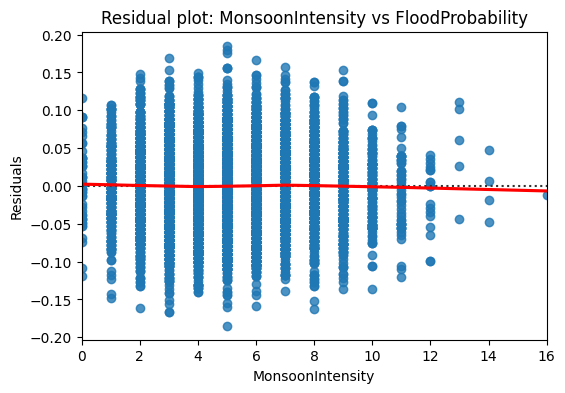

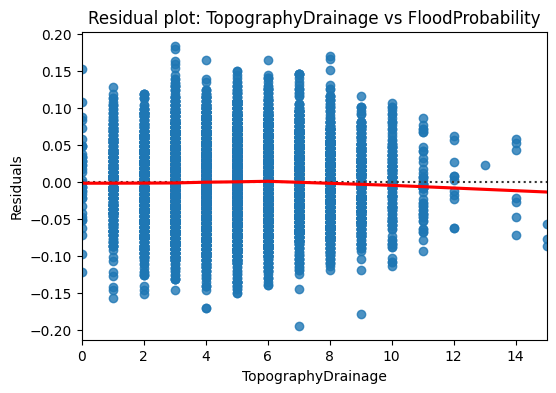

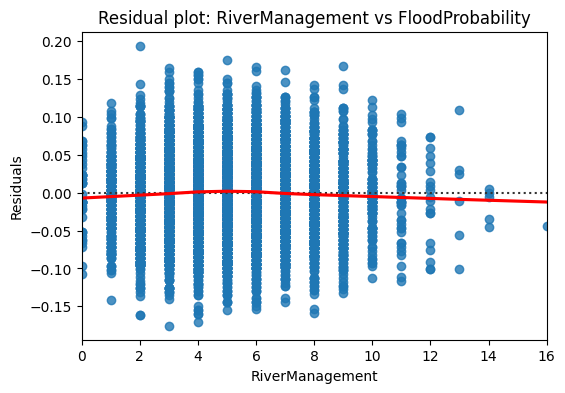

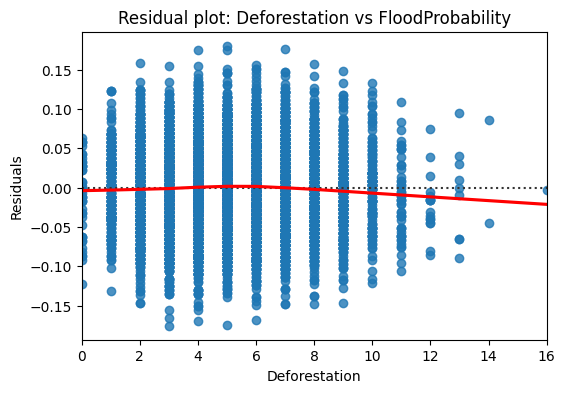

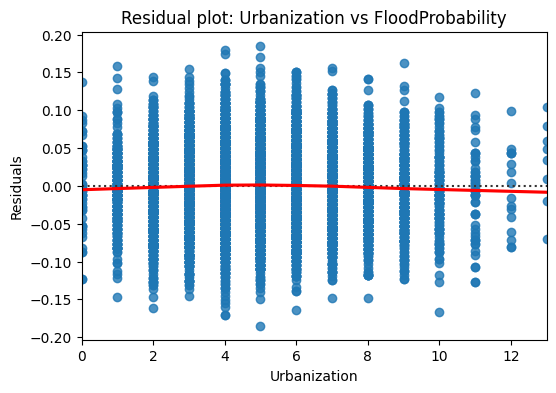

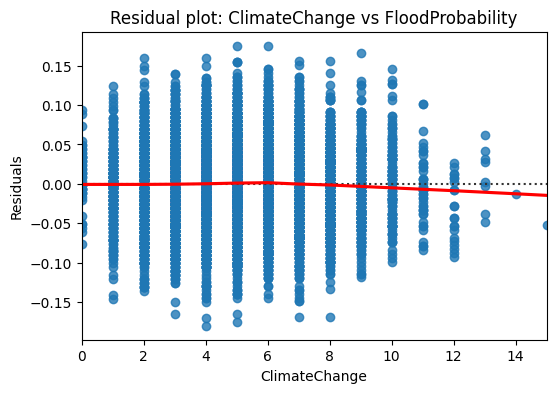

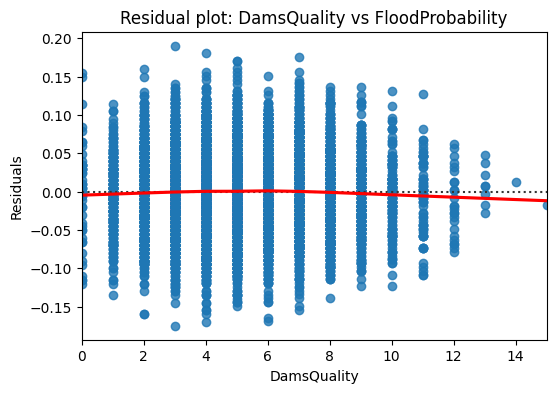

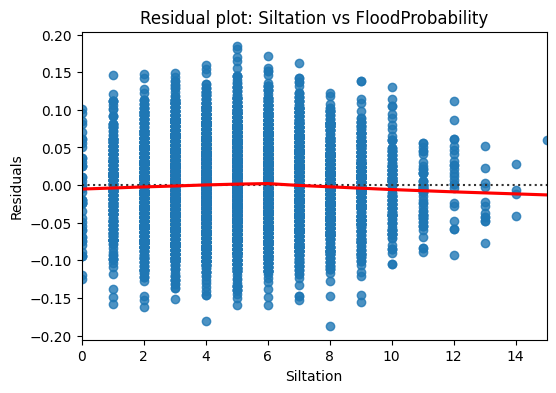

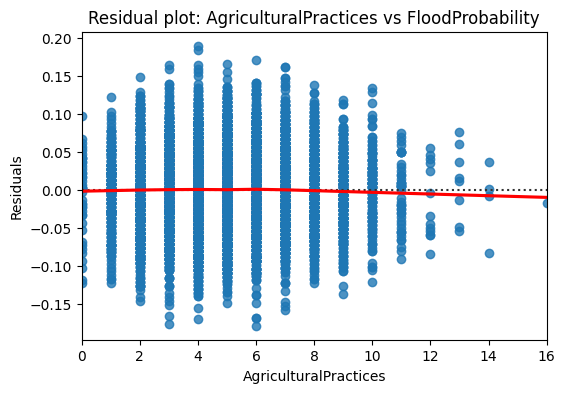

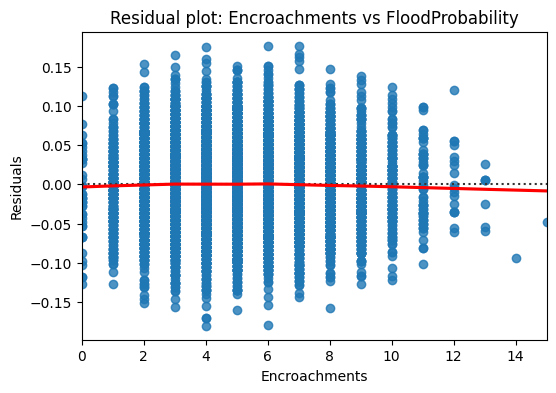

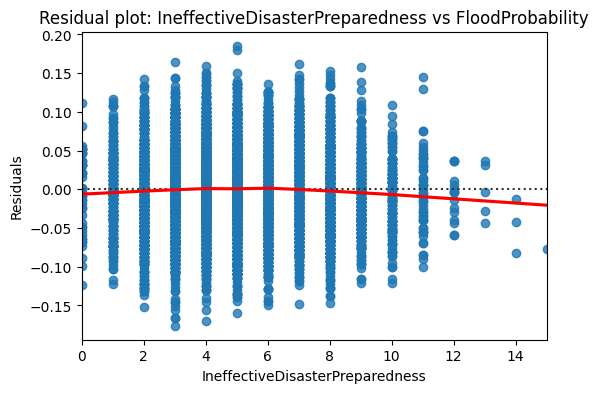

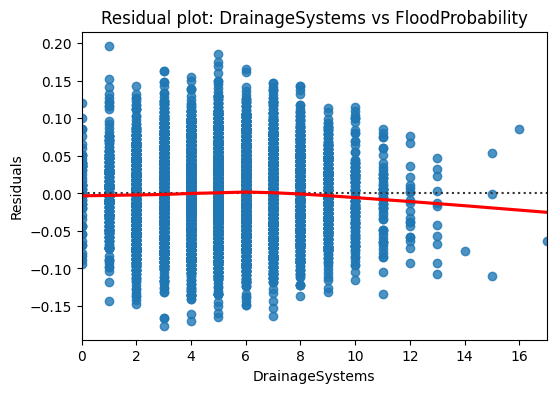

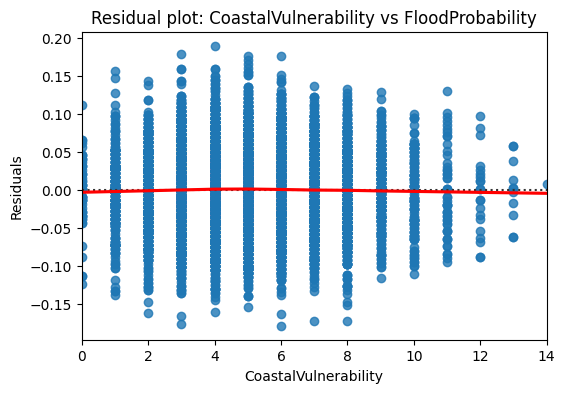

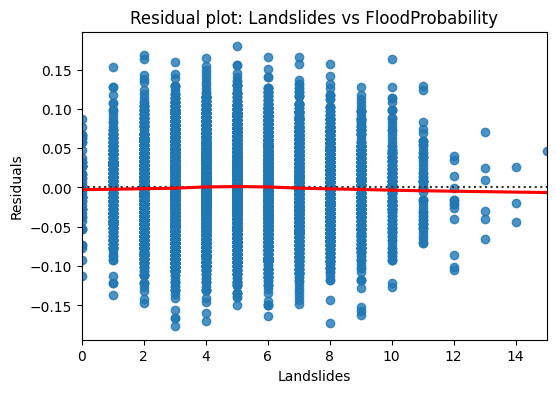

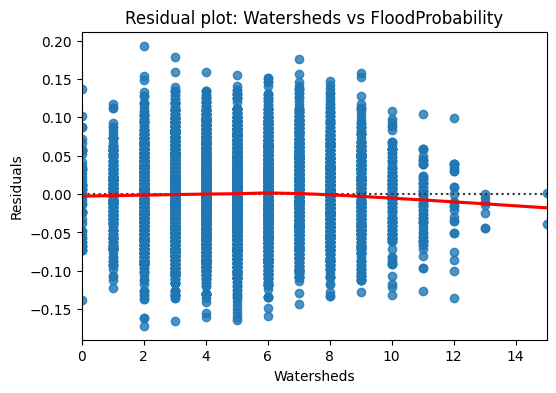

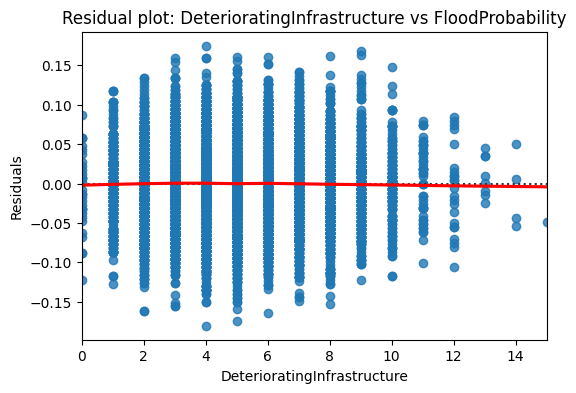

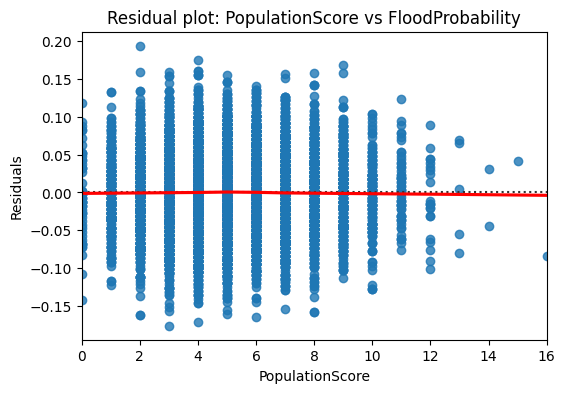

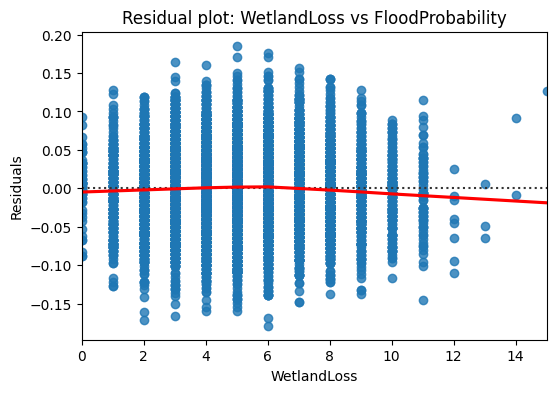

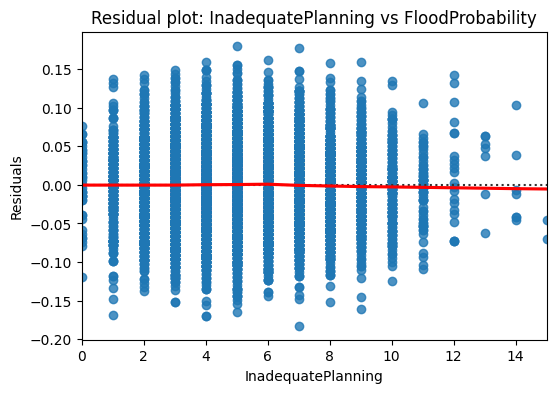

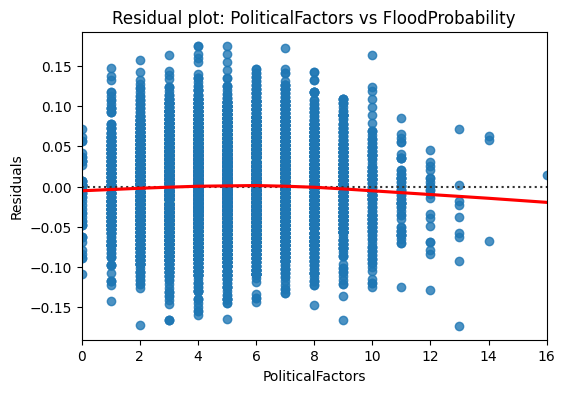

In [29]:

features = [
    "MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation",
    "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices",
    "Encroachments", "IneffectiveDisasterPreparedness", "DrainageSystems",
    "CoastalVulnerability", "Landslides", "Watersheds", "DeterioratingInfrastructure",
    "PopulationScore", "WetlandLoss", "InadequatePlanning", "PoliticalFactors"
]

for col in features:
    plt.figure(figsize=(6,4))
    sns.residplot(x=traindata[col], y=traindata["FloodProbability"], lowess=True,
                  line_kws={"color": "red"})
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Residual plot: {col} vs FloodProbability")
    plt.show()

## Test File

In [30]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

# TRAINING THE MODEL
I used a multiple linear regression model to make use of all the useful features. My reasoning is that since the data is a little spread out on the trend for each feature, we are able to make a better model by using the stronger trends together. The pattern that i noticed is that for most features, there is a part on it that has a strong trend even if it has a lot of spread data outside of it. If we could use those together then we can keep increasing the R^2 even if there is a lot of data that is outside the strong trend.

In [31]:
# Training the Model

# Set independent and dependent variables
X = original_traindata[['MonsoonIntensity', 'RiverManagement', 'Deforestation', 'Urbanization','Siltation', 'Encroachments', 'IneffectiveDisasterPreparedness','DrainageSystems', 'Landslides', 'Watersheds','DeterioratingInfrastructure', 'PopulationScore','InadequatePlanning', 'DamsQuality', 'ClimateChange', 'TopographyDrainage', 'CoastalVulnerability', 'AgriculturalPractices', 'PoliticalFactors', 'WetlandLoss']]

X = sm.add_constant(X)
y = original_traindata['FloodProbability']

# Initialize model from sklearn and fit it into our data
model = LinearRegression()

# Train the model
model.fit(X, y)

# Test the model using the same input data
y_pred = model.predict(X)

olsmod = sm.OLS(y, X).fit()
olsmod.summary()











<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:34:15   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Reasoning for R^2.
Upon checking the features with the visualization graphs, I can see that on the correlation matrix, the correlation is weak. On the scatterplot, there is not an obvious trend neither. However, I noticed that on most of the features, there are trends that are stronger, like there is a range where most of the data is gathered there. Even if there is data outside of that making it look very spread out, we can use the stronger trends part and combine them to keep increasing the R2. Because with more strong trends we combine together, the weaker the spread out data becomes, therefore increasing our R2.

In [32]:
olsmod.rsquared

np.float64(0.8449501050792338)

## Sample Submission File

In [34]:
# Load sample submission (with IDs)
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)

# Align testdata columns to match the model's training columns
expected_cols = model.feature_names_in_
testdata_aligned = testdata.reindex(columns=expected_cols, fill_value=0)

# Predict
y_pred = model.predict(testdata_aligned)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': samplefile['id'],
    'FloodProbability': y_pred
})

# Save to CSV
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")


Submission file created: submission_file.csv
